In [1]:
import pandas as pd # import pandas under alias
import matplotlib.pyplot as plt # import matplotlib's pyplot under alias

In [2]:
df = pd.read_csv('../housing.csv') # read the CSV formatted data into a dataframe

### Note -- the housing dataset is too large to be uploaded to github. The dataset can be found at this link: https://www.kaggle.com/austinreese/usa-housing-listings

In [3]:
print(df.columns) # view the features

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')


In [4]:
print(df.shape) # view the shape

(384977, 22)


In [5]:
drop_columns = ['id', 'url', 'region_url', 'image_url', 'description'] # define unnecessary columns
# 2 of these columns contain urls which take up a lot of space making the file large

In [6]:
df = df.drop(drop_columns, axis=1) # drop the columns

In [7]:
display(df.head()) # view the first 5 rows

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


In [8]:
print(df.isna().sum()) # view the count of missing values

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64


In [9]:
# fill laundry and parking column missing values with "unknown"
df[['laundry_options', 'parking_options']] = df[['laundry_options', 'parking_options']].fillna('unknown')

In [10]:
df = df.dropna(how='any') # drop any values missing latitude and longitude
print(df.shape) # view the new shape

(383059, 17)


In [11]:
display(df.describe()) # view the descriptive statistics

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.830590e+05,3.830590e+05,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000,383059.000000
mean,8.862148e+03,1.059198e+03,1.904127,1.480063,0.727264,0.708102,0.731963,0.082228,0.012875,0.047679,37.233487,-92.700631
std,4.473357e+06,1.919860e+04,3.502627,0.617504,0.445367,0.454636,0.442938,0.274711,0.112737,0.213087,5.546171,16.531980
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.060000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,1.035000e+03,9.480000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,1.395000e+03,1.149000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


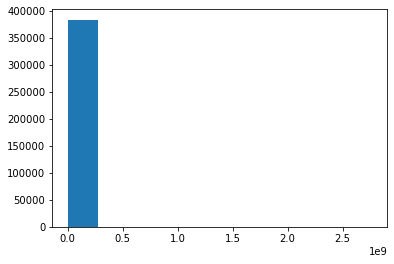

The minimum price is $0 per month
The maximum price is $2768307249 per month


In [12]:
# view the histogram for home price per month
plt.hist(df['price'])
plt.show()

print('The minimum price is ${} per month'.format(df.price.min()))
print('The maximum price is ${} per month'.format(df.price.max()))

In [13]:
print(df['price'].quantile(0.99)) # the 99th percentile is $3395 per month which seems reasonable

3395.0


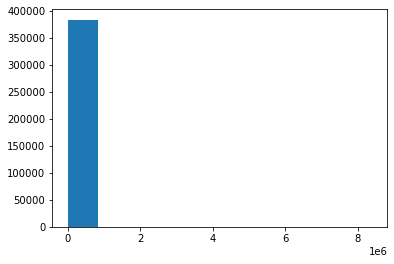

The minimum square footage is 0 square feet
The maximum square footage is 8388607 square feet


In [14]:
# view the histogram for square footage
plt.hist(df['sqfeet'])
plt.show()

print('The minimum square footage is {} square feet'.format(df.sqfeet.min()))
print('The maximum square footage is {} square feet'.format(df.sqfeet.max()))

In [15]:
print(df['sqfeet'].quantile(0.999)) # the 99.9th percentile is 4200 sq feet which seems reasonable

4200.0


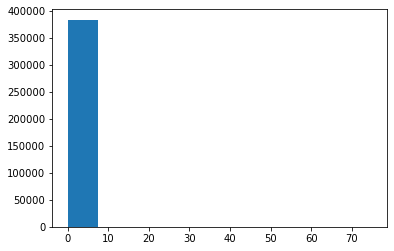

The minimum number of bathrooms is 0.0
The maximum number of bathrooms is 75.0


In [16]:
# view the histogram for number of bathrooms
plt.hist(df['baths'])
plt.show()

print('The minimum number of bathrooms is {}'.format(df.baths.min()))
print('The maximum number of bathrooms is {}'.format(df.baths.max()))

In [17]:
print(df.baths.value_counts()) # view the values for the baths column

# there seems to be some input errors. 25, 35 and 75 bathrooms may represent 2.5, 3.5 and 7.5 respectively, but I 
# will safely drop those columns since there are so few

1.0     197296
2.0     134006
1.5      27256
2.5      13033
3.0       5443
0.0       3090
4.0       1478
3.5       1005
4.5        223
5.0        130
5.5         57
6.0         26
6.5          4
7.0          4
75.0         2
7.5          2
8.0          1
25.0         1
35.0         1
8.5          1
Name: baths, dtype: int64


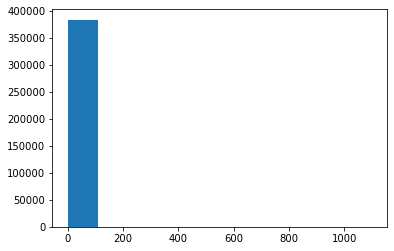

The minimum number of bedrooms is 0
The maximum number of bedrooms is 1100


In [18]:
# view the histogram for the number of bedrooms
plt.hist(df['beds'])
plt.show()

print('The minimum number of bedrooms is {}'.format(df.beds.min()))
print('The maximum number of bedrooms is {}'.format(df.beds.max()))

In [19]:
print(df.beds.value_counts()) # view the values for the beds column

# additionally, we see some input errors. 1000 and 1100 seems to be a mistake. I will remove those entries. It is,
# however, possible to have 0 bedrooms assuming those are studio apartments. I will keep those entries

2       174705
1       116823
3        66520
4        11454
0        10922
5         2313
6          238
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64


In [20]:
def min_max(dataframe, col, lower, upper):
    """drops outliers that may contain misinformation"""
    
    # define the lower boundry
    lower_bound = dataframe[dataframe[col] >= lower]
    
    # define the upper boundry
    upper_bound = lower_bound[lower_bound[col] <= upper]
    
    # return the results
    return upper_bound[col]

In [21]:
# set the lower boundry to $300 per month for price (seems reasonable) and the 99th percentile for the upper boundry
df['price'] = min_max(df, 'price', lower=300, upper=df['price'].quantile(0.99))

# set the lower boundry to 400 square feet (seems reasonable) and the 99.9th percentile for the upper boundry
df['sqfeet'] = min_max(df, 'sqfeet', lower=400, upper=df['sqfeet'].quantile(0.999))

# set the lower boundry to one bathroom and the upper boundry to 6. We will be dropping 17 rows in total
df['baths'] = min_max(df, 'baths', lower=1, upper=6)

# set the lower boundry to one bathroom and the upper boundry to 6. We will be dropping 17 rows in total
df['beds'] = min_max(df, 'beds', lower=0, upper=8)

# I am not taking lower boundry percentiles due to how right-tail skewed the data is. I decided instead to use values
# that seem reasonable

In [22]:
clean_df = df.dropna(how='any') # drop any missing values that may have been removed

In [23]:
print(clean_df.shape) # view the new shape

(367357, 17)


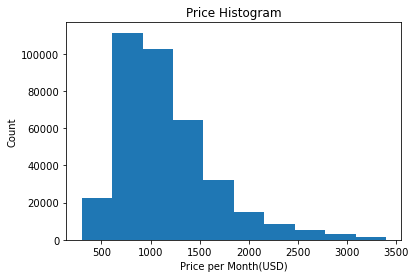

In [36]:
# view the new histogram for home price per month
plt.hist(clean_df['price'])
plt.title('Price Histogram')
plt.xlabel('Price per Month(USD)')
plt.ylabel('Count')
plt.show()

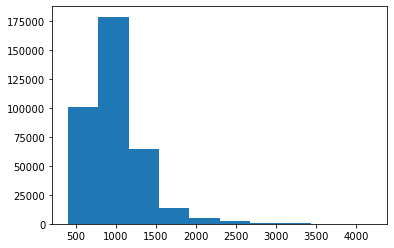

In [25]:
# view the new histogram for square footage
plt.hist(clean_df['sqfeet'])
plt.show()

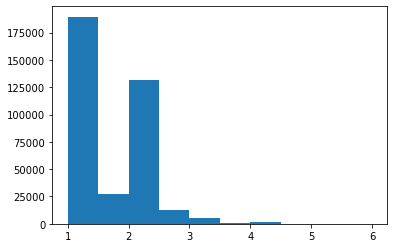

In [26]:
# view the new histogram for bathrooms
plt.hist(clean_df['baths'])
plt.show()

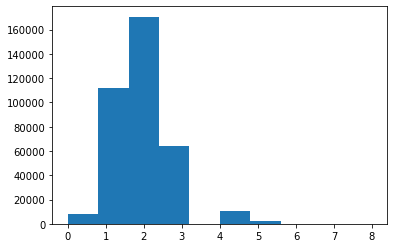

In [27]:
# view the new histogram for bathrooms
plt.hist(clean_df['beds'])
plt.show()

In [28]:
print('The new minimum price is ${} per month'.format(clean_df['price'].min()))
print('The new maximum price is ${} per month'.format(clean_df['price'].max()))

The new minimum price is $300.0 per month
The new maximum price is $3395.0 per month


In [29]:
print('The new minimum square footage is {} square feet'.format(clean_df['sqfeet'].min()))
print('The new maximum square footage is {} square feet'.format(clean_df['sqfeet'].max()))

The new minimum square footage is 400.0 square feet
The new maximum square footage is 4200.0 square feet


In [30]:
# view the new descriptive statistics
display(clean_df.describe())

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000,367357.000000
mean,1163.884573,994.907586,1.903086,1.490109,0.732369,0.712544,0.736548,0.079315,0.012203,0.039311,37.245365,-92.470732
std,490.588168,354.609974,0.853236,0.566402,0.442725,0.452577,0.440506,0.270230,0.109793,0.194333,5.538572,16.384773
min,300.000000,400.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,819.000000,754.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.451000,-98.532200
50%,1042.000000,950.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.666200,-87.581500
75%,1395.000000,1147.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.160200,-81.144400
max,3395.000000,4200.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


In [31]:
# make state values uppercase
clean_df.loc[:,'state'] = [value.upper() for value in clean_df['state']]

/Users/matthew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [32]:
print(clean_df['state'].sample(10)) # verify results

205690    NM
6288      CA
288407    TX
371806    CA
293920    TX
283488    TN
284738    TX
338219    WA
142321    MA
250369    PA
Name: state, dtype: object


In [33]:
# confirm there are no missing results
print(clean_df.isna().sum())

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64


In [34]:
# break the data into 2 seperate files so they can be uploaded to Github
partition_1 = clean_df.iloc[:round(clean_df.shape[0] * 0.5), :]
partition_2 = clean_df.iloc[round(clean_df.shape[0] * 0.5):, :]

In [35]:
# output the dataframe in CSV format
partition_1.to_csv('../Datasets/clean_housing_1.csv')
partition_2.to_csv('../Datasets/clean_housing_2.csv')